In [1]:
# Common imports
import sys

# Third-party imports
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
initial_inventory = 100
sample_size = 20
demand = np.random.randint(-5, 1, size=sample_size)
months = np.random.randint(1, 13, size=sample_size)
days = np.random.randint(1, 30, size=sample_size)

In [44]:
date_list = []
for i in range(0, sample_size):
    date_list.append(pd.datetime(2016, months[i], days[i]))
date_list

[datetime.datetime(2016, 10, 25, 0, 0),
 datetime.datetime(2016, 7, 24, 0, 0),
 datetime.datetime(2016, 11, 4, 0, 0),
 datetime.datetime(2016, 5, 1, 0, 0),
 datetime.datetime(2016, 10, 21, 0, 0),
 datetime.datetime(2016, 3, 17, 0, 0),
 datetime.datetime(2016, 6, 25, 0, 0),
 datetime.datetime(2016, 7, 3, 0, 0),
 datetime.datetime(2016, 5, 9, 0, 0),
 datetime.datetime(2016, 11, 10, 0, 0),
 datetime.datetime(2016, 7, 15, 0, 0),
 datetime.datetime(2016, 5, 4, 0, 0),
 datetime.datetime(2016, 2, 27, 0, 0),
 datetime.datetime(2016, 6, 26, 0, 0),
 datetime.datetime(2016, 8, 23, 0, 0),
 datetime.datetime(2016, 11, 15, 0, 0),
 datetime.datetime(2016, 7, 12, 0, 0),
 datetime.datetime(2016, 10, 13, 0, 0),
 datetime.datetime(2016, 9, 19, 0, 0),
 datetime.datetime(2016, 4, 17, 0, 0)]

### Create a dataframe

In [88]:
data = {'date': date_list,
        'demand': demand}
df = pd.DataFrame(data, columns = ['date', 'demand'])
df

,date,demand
0,2016-10-25,-3
1,2016-07-24,-3
2,2016-11-04,-4
3,2016-05-01,0
4,2016-10-21,-4
5,2016-03-17,-5
6,2016-06-25,-3
7,2016-07-03,-4
8,2016-05-09,-3
9,2016-11-10,-2


### Set df['date'] as the index

In [89]:
df.set_index('date', drop=True, inplace=True)
df

,demand
date,
2016-10-25,-3
2016-07-24,-3
2016-11-04,-4
2016-05-01,0
2016-10-21,-4
2016-03-17,-5
2016-06-25,-3
2016-07-03,-4
2016-05-09,-3


In [74]:
df.sort_index(inplace=True)
df

,demand
date,
2016-02-27,-2
2016-03-17,-5
2016-04-17,-2
2016-05-01,0
2016-05-04,-1
2016-05-09,-3
2016-06-25,-3
2016-06-26,-3
2016-07-03,-4


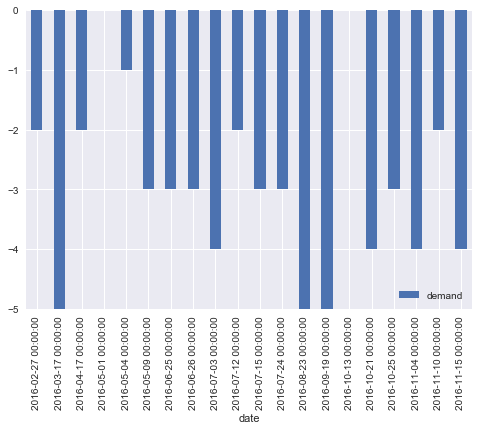

In [52]:
df.plot.bar()

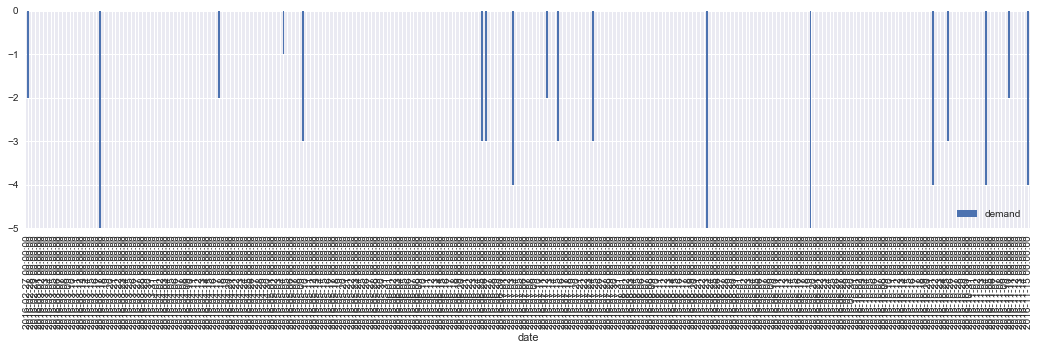

In [57]:
df.resample('D').sum().plot.bar(figsize=(18,4))

In [90]:
df.loc[pd.datetime(2016,1,1)] = 0
df.sort_index(inplace=True)
df

,demand
date,
2016-01-01,0
2016-02-27,-2
2016-03-17,-5
2016-04-17,-2
2016-05-01,0
2016-05-04,-1
2016-05-09,-3
2016-06-25,-3
2016-06-26,-3


In [91]:
df['inventory'] = initial_inventory + df['demand'].cumsum()
df

,demand,inventory
date,,
2016-01-01,0,100
2016-02-27,-2,98
2016-03-17,-5,93
2016-04-17,-2,91
2016-05-01,0,91
2016-05-04,-1,90
2016-05-09,-3,87
2016-06-25,-3,84
2016-06-26,-3,81


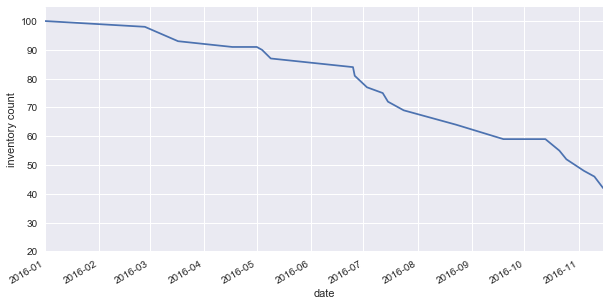

In [116]:
df.inventory.plot(figsize=(10,5))
plt.ylim([20,105])
plt.ylabel('inventory count')

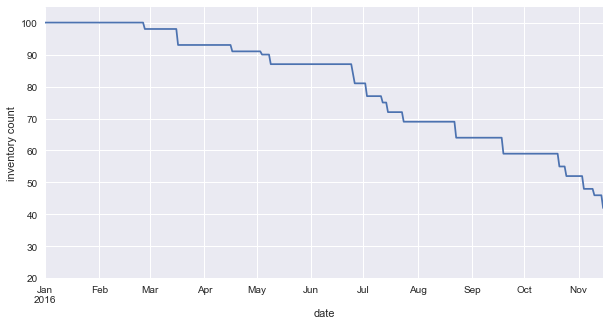

In [117]:
inventory = df.inventory.resample('D').sum().ffill()
inventory.plot(figsize=(10,5))
plt.ylim([20,105])
plt.ylabel('inventory count')

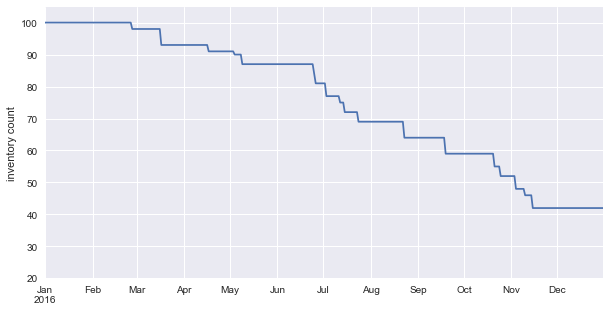

In [120]:
inventory = inventory.reindex(pd.DatetimeIndex(start=inventory.index[0], end=pd.datetime(2016,12,31), freq='D'), method='ffill')
inventory.plot(figsize=(10,5))
plt.ylim([20,105])
plt.ylabel('inventory count')

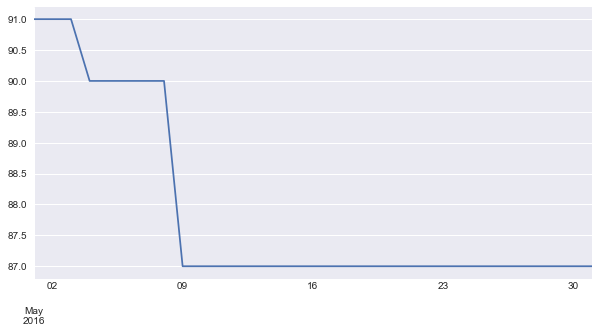

In [123]:
inventory['2016-05'].plot(figsize=(10,5))

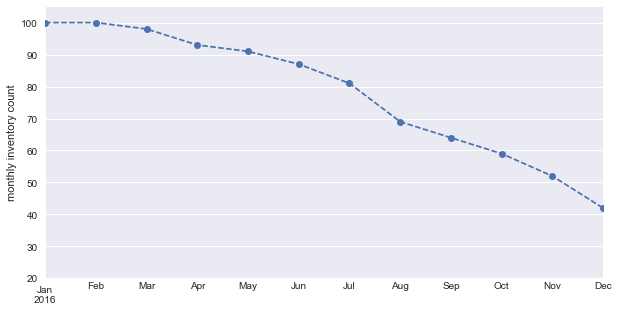

In [134]:
inventory.resample('M').first().plot(style='o--', figsize=(10,5))
#inventory.resample('M').first().plot.bar(figsize=(10,5))
plt.ylim([20,105])
plt.ylabel('monthly inventory count')